# Hierarchy-( Scipy )



همانطور که الگوریتم در اسکیت لرن وجود دارد در سای پای هم وجود دارد دراینجا ما با همون داده ها از طریق سای پای الگوریتم رو اجرا میکنیم.
توجه داشته باشید خود اسکیت لرن از سای پای استفاده میکنه اما به دلیل جامع بودنش نسبت به سای پای گزینه کامل تری برای یادگیری ماشین و پیاده یازی الگوریتم است.

Just as the algorithm exists in Scikit-learn, it also exists in SciPy. Here, we run the algorithm using SciPy with the same dataset.
Note that Scikit-learn itself uses SciPy, but due to its comprehensiveness compared to SciPy, it is a more complete option for machine learning and algorithm implementation.



 توجه توضیح یسری از سلول ها اگر وجود نداره در فایل

music.ipynb
 هست


 Note: Some of the explanations or cells may be missing here, but they are available in the file `music.ipynb`.

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import scipy
from scipy.spatial import distance_matrix
from sklearn.ensemble import RandomForestClassifier



In [115]:
x=pd.read_csv('marketing_campaign.csv')
x[:5]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,5,0,0,0,0,0,0,3,11,0


In [116]:
x.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [117]:
x=x.dropna()
x=x.reset_index(drop=True)

In [118]:
from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()
x['Education']=lb.fit_transform(x['Education'])


lb2=LabelEncoder()
x['Marital_Status']=lb2.fit_transform(x['Marital_Status'])

In [119]:
y=x['Response'].values
y

array([1, 0, 0, ..., 0, 0, 1], shape=(2216,))

In [120]:
#

In [121]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)


این قطعه کد در واقع میاد ارایه دو بعدی رو تولید میکنه(ماتریس) که درون اون تمام مقادیر 0 هستن به وسیله همین ارایه ها مقادیر محاسبه شده ما در اونجا میرن و ذخیره میشن

This piece of code actually creates a 2D array in which all the values are 0. Using this array, our computed values go there and get stored

In [122]:
lg=x.shape[0]
td=np.zeros([lg,lg])
for i in range(lg):
    for j in range(lg):
        td[i,j]=scipy.spatial.distance.euclidean(x[i],x[j])
td

array([[0.        , 8.02887542, 5.81836402, ..., 8.13757698, 6.03188176,
        7.30109017],
       [8.02887542, 0.        , 5.58455473, ..., 7.63547576, 5.38971929,
        4.35217102],
       [5.81836402, 5.58455473, 0.        , ..., 6.42929283, 3.10228282,
        6.46794073],
       ...,
       [8.13757698, 7.63547576, 6.42929283, ..., 0.        , 6.95483671,
        7.71817401],
       [6.03188176, 5.38971929, 3.10228282, ..., 6.95483671, 0.        ,
        5.64815126],
       [7.30109017, 4.35217102, 6.46794073, ..., 7.71817401, 5.64815126,
        0.        ]], shape=(2216, 2216))


برای اینکه با الگوریتم سلسله مراتب کار کنیم و عملیات لینکیج رو انجام بدیم در آن , باید حتما حتما داده ما یک داده یک بعدی فشرده باشه .
چون در سلول بالا داده رو ب یک مارتیس 2 بعدی تبدیل کردیم, سلسله مراتب نمیتوانست نتایحج خوبی به ما بدهد.
به همین خاطر, ما از ماژول و معیار زیر استفاده کردیم برای فشرده سازی داده 2 بعدی و تبدیل آن به یک ارایه 1 بعدی.

To apply hierarchical algorithms and perform linkage operations, it is essential that our data be a compressed one-dimensional array.
Since the data in the previous cell was transformed into a two-dimensional matrix, the hierarchical method could not yield satisfactory results.
Therefore, we used the following module and metric to compress the 2D data and convert it into a 1D array.

In [123]:
from scipy.spatial.distance import  squareform
condensed_td = squareform(td)


In [124]:
from scipy.cluster import hierarchy

model=hierarchy.linkage(condensed_td,'ward')
model

array([[5.00000000e+01, 7.19000000e+02, 9.23462496e-04, 2.00000000e+00],
       [3.56000000e+02, 6.61000000e+02, 2.46256666e-03, 2.00000000e+00],
       [6.45000000e+02, 1.61300000e+03, 2.46256666e-03, 2.00000000e+00],
       ...,
       [4.40000000e+03, 4.42500000e+03, 7.11765610e+01, 5.43000000e+02],
       [4.42400000e+03, 4.42800000e+03, 8.88476554e+01, 1.12400000e+03],
       [4.42700000e+03, 4.42900000e+03, 1.35260150e+02, 2.21600000e+03]],
      shape=(2215, 4))

<div/> <"div dir="rtl>
در اینجا الگوریتم رو پیاده سازی  کردیم  و هر داده که براساس فاصله اقلیدوسی بین نقاط خوشه فاصلش تا مرکز خوشه آن کمتر از 4 هست در یک خوشه گذاشته میشن.


Here, we implemented the algorithm, and each data point whose Euclidean distance to a cluster center is less than 4 is placed in a cluster.

In [125]:
from scipy.cluster.hierarchy import fcluster
cluster=4
model1=fcluster(model,cluster,criterion='distance')
model1

array([664, 175, 739, ..., 241, 392, 215], shape=(2216,), dtype=int32)



در این قسمت شکل دندوگرام ما رسم شده است. خط آبی در اینجا دو خوشه جدا از هم مارا بهم وصل میکنه ونشون دهنده ادقام ویژگی های ما است .

In this section, our dendrogram is plotted. The blue line here connects two separate clusters and indicates the merging of our features.

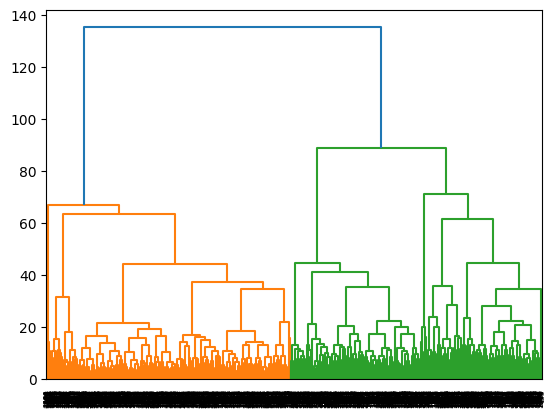

In [126]:
dendo=hierarchy.dendrogram(model)